作为机器学习的⼀类，深度学习通常基于**神经⽹络**模型逐级表⽰越来越抽象的概念或模式。我们先从线性回归和 softmax 回归这两种单层神经⽹络⼊⼿，简要介绍机器学习中的基本概念。然后，由单层神经⽹络延伸到多层神经⽹络，并通过多层感知机引⼊深度学习模型。在观察和了解了模型的**过拟合现象**后，我们将介绍深度学习中应对过拟合的常⽤⽅法：**权重衰减和丢弃法**。接着，为了进⼀步理解深度学习模型训练的本质，我们将详细解释**正向传播和反向传播**。掌握这两个概念后，我们能更好地认识深度学习中的**数值稳定性和初始化**的⼀些问题。最后，我们通过⼀个深度学习应⽤案例对本章内容学以致⽤。

我们先介绍单层神经⽹络：线性回归和softmax回归。

**线性回归**输出是⼀个连续值，因此适⽤于回归问题。回归问题在实际中很常⻅，如预测房屋价格、⽓温、销售额等连续值的问题。与回归问题不同，**分类问题**中模型的最终输出是⼀个离散值。我们所说的图像分类、垃圾邮件识别、疾病检测等输出为离散值的问题都属于分类问题的范畴。softmax回归则适⽤于分类问题。

由于线性回归和softmax回归都是单层神经⽹络，它们涉及的概念和技术同样适⽤于⼤多数的深度学习模型。我们⾸先以线性回归为例，介绍⼤多数深度学习模型的基本要素和表⽰⽅法。

# 线性回归

## 模型

假设有如下简单**线性模型**$$\hat y = x_1w_1 + x_2w_2 + b$$其中 $w_1$, $w_2$ 是权重（weight），通常⽤向量 $w = [w_1, w_2]^⊤$来表⽰；b是偏差（bias）。这⾥的权重和偏差是线性回归模型的参数（parameter）。

在应用中，可以假设通过房屋的⾯积（设 $x_1$）和房龄（设 $x_2$）来**估算**它的真实价格（设 y）。接下来，让我们了解⼀下如何通过训练模型来学习模型参数。

学习模型需要**训练数据**。房屋数据集中，⼀栋房屋的特征和标签就是⼀个数据样本。设训练数据集样本数为 n，索引为 i 样本的特征为$x^{(i)}_1,x^{(i)}_2$，标签为$ y^{(i)}$。对于索引为 i 的房屋，线性回归模型的价格估算表达式为$$\hat y^{(i)} = x^{(i)}_1 w_1 + x^{(i)}_2w_2 + b$$

在模型训练中，希望模型的估计值和真实值在训练数据集上尽可能接近。⽤平⽅损失（square loss）来定义数据样本 i 上的**损失**（loss）为$$\ell^{(i)}(w_1, w_2, b) =\frac{ (\hat y^{(i)}- y^{(i)})^2}{2}$$显然，当该损失越小时，模型在数据样本 i 上的估计值和真实值越接近。其中的常数$\frac{1}{2}$将使得求导后常数为1，在形式上会简单些。

已知训练数据集样本数为 n。线性回归的⽬标是找到**⼀组模型参数**$w_1, w_2, b$ 来最小化损失函数$$\ell(w_1, w_2, b)=\frac{1}{n}\sum_{i=1}^n\ell ^{(i)}(w_1, w_2, b)=\frac{1}{n}\sum_{i=1}^n\frac{1}{2}(x_1^{(i)}w_1+x_2^{(i)}w_2+b-y^{(i)})^2$$
在上式中，损失函数 $\ell(w_1, w_2, b) $可看作是训练数据集中各个样本上损失的平均，平方误差函数也称为**平方损失**。

在模型训练中，我们希望找出⼀组模型参数，记为$w^*_1, w^*_2, b^*$来使训练样本平均损失最小：$$w^*_1, w^*_2, b^* =argmin_{w_1,w_2,b}\ell(w_1,w_2,b)$$

在线性回归这个简单例⼦⾥，令损失函数对模型参数求导后的结果为零可以解出最小化损失函数的模型参数。这类解叫做解析解（analytical solution）。然而，⼤多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫做**数值解（**numerical solution）。

在求数值解的优化算法中，**小批量随机梯度下降（mini-batch stochastic gradient descent）**被⼴泛使⽤。它的算法很简单：每⼀次迭代前，我们可以随机均匀采样⼀个由训练数据样本所组成的小批量（mini-batch）$\beta$；然后求小批量中数据样本的平均损失有关模型参数的导数（梯度）；再⽤此结果与预先设定的⼀个正数的乘积作为模型参数在本次迭代的减小量。

在训练本节讨论的线性回归模型的过程中，模型的每个参数将迭代如下：![jupyter](./LineReg-1.png)

在上式中，$|\beta|$代表每个小批量中的样本个数（批量⼤小，batch size），η 称作**学习率**（learningrate）并取正数。需要强调的是，这⾥的批量⼤小和学习率的值是⼈为设定的，并不是通过模型训练学出的，因此叫做**超参数**（hyperparameter）。我们通常所说的**“调参”**指的正是调节超参数，例如通过反复试错来找到合适的超参数。少数情况下，超参数也可以通过模型训练学出。本书对此类情况不做讨论。

我们将在之后的“优化算法”⼀章中详细解释小批量随机梯度下降和其他优化算法。

得到模型参数后，就可以对任意输入计算估值，估算也叫作**模型预测**、模型推断或模型测试。

## 线性回归的表⽰⽅法
我们已经阐述了线性回归的模型表达式、训练和预测。下⾯我们解释**线性回归与神经⽹络的联系**，以及线性回归的⽮量计算表达式。

**神经⽹络图**

在深度学习中，我们可以使⽤神经⽹络图直观地表现模型结构。为了更清晰地展⽰线性回归作为神经⽹络的结构，下图使⽤神经⽹络图表⽰本节中介绍的线性![jupyter](./LineReg-2.png)回归模型。神经⽹络图隐去了模型参数权重和偏差。

输⼊分别为$x_1$和$x_2$，因此输⼊层的输⼊个数为2。输⼊个数也叫特征数或**特征向量维度**。图中⽹络的输出为o，输出层的输出个数为1。需要注意的是，我们直接将图中神经⽹络的输出o作为线性回归的输出，即$\hat y = o$。由于输⼊层并不涉及计算，按照惯例，神经⽹络的层数为1。所以，**线性回归是⼀个单层神经⽹络**。输出层中负责计算o的单元⼜叫神经元。在线性回归中，o的计算依赖于x1和x2。也就是说，输出层中的神经元和输⼊层中各个输⼊完全连接。因此，这⾥的输出层⼜叫全连接层（fully-connected layer）或稠密层（dense layer）。

**⽮量计算表达式**

在模型训练或预测时，我们常常会同时处理多个数据样本并⽤到⽮量计算。在介绍线性回归的⽮量计算表达式之前，让我们先考虑对两个向量相加的两种⽅法。

In [31]:
from mxnet import nd
from time import time
a = nd.ones(shape=1000) 
b = nd.ones(shape=1000)

In [32]:
#向量相加的⼀种⽅法是，将这两个向量按元素逐⼀做标量加法。
start = time()
c = nd.zeros(shape=1000)
for i in range(1000):
    c[i] = a[i] + b[i]
time() - start

0.6319973468780518

In [33]:
#将两个向量直接做矢量加法
start = time()
d=a+b
time() - start

0.0009984970092773438

后者⽐前者更省时。因此，我们应该**尽可能采⽤⽮量计算**，以提升计算效率。

对训练数据集⾥的3个房屋样本（索引分别为1、 2和3）逐⼀预测价格，将得到![jupyter](./LineReg-3.png)将上⾯3个等式转化成⽮量计算。设![jupyter](./LineReg-4.png)
对3个房屋样本预测价格的⽮量计算表达式为$\hat y = Xw + b$, 其中的加法运算使⽤了⼴播机制。

⼴义上讲，当数据样本数为n，特征数为d时，线性回归的⽮量计算表达式为$\hat y = Xw + b$

设模型参数$\theta=[w_1,w_2,b]^T$，重写损失函数$$\ell(\theta)=\frac{1}{2n}(\hat y-y)^T(\hat y-y)$$小批量随机梯度下降的迭代步骤将相应地改写为$$\theta \longleftarrow \theta-\frac{\eta}{|\beta|}\sum_{i\in \beta}\bigtriangledown _\theta \ell^{(i)}(\theta)$$其中梯度是损失有关3个为标量的模型参数的偏导数组成的向量：![jupyter](./LineReg-5.png)

## 线性回归从零实现

在了解了线性回归的背景知识之后，现在我们可以动⼿实现它了。尽管强⼤的深度学习框架可以减少⼤量重复性⼯作，但若过于依赖它提供的便利，我们就会很难深⼊理解深度学习是如何⼯作的。因此，本节将介绍如何**只利⽤NDArray和autograd**来实现⼀个线性回归的训练。⾸先，导⼊本节中实验所需的包或模块，其中的matplotlib包⽤于作图。

我们在这⾥描述⽤来⽣成⼈⼯训练数据集的真实模型。使⽤⼈⼯训练数据集将使我们能够⽐较学到的参数和真实的模型参数。设训练数据集样本数为1000，输⼊个数为2。给定随机⽣成的批量样本特征$X∈R^{1000×2}$，我们使⽤线性回归模型真实权重$w=[2,−3.4]^⊤$和偏差b=4.2，以及⼀个随机噪⾳项ϵ来⽣成标签。
$y=Xw+b+\epsilon$

其中噪⾳项ϵ服从均值为0和标准差为0.01的正态分布。下⾯，让我们⽣成数据集。

In [34]:
#from IPython.display import set_matplotlib_formats
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [35]:
#生成训练集
num_inputs=2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
#均值loc,标准差scale
features = nd.random.normal(loc=0,scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

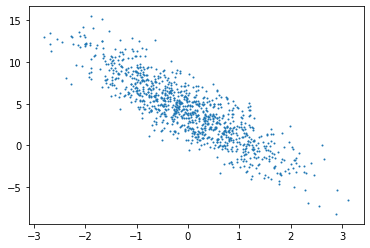

In [36]:
'''
def set_figsize(figsize=(3.5,2.5)):
    set_matplotlib_formats('svg')#打印矢量图
    plt.rcParams['figure.figsize']=figsize#设置尺寸
    
set_figsize()
'''
plt.scatter(features[:,1].asnumpy(),labels.asnumpy(),1)
plt.show()

In [37]:
#定义一个函数：它每次返回batch_size（批量大小）个随机样本的特征和标签。
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  #shuffle() 方法将序列的所有元素随机排序
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)  # take函数根据索引返回对应元素

In [38]:
#读取第一个小批量数据样本并打印。每个批量的特征形状为(10, 2)，分别对应批量大小和输入个数；标签形状为批量大小。
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-1.4069158   0.2274378 ]
 [-0.5732961  -1.0055317 ]
 [ 0.52791333 -1.0662739 ]
 [-1.0647175   0.48607218]
 [ 0.18270281 -1.8266431 ]
 [ 0.80127084 -0.80003786]
 [-1.8189818   0.79729116]
 [-0.6585579   0.25549018]
 [ 0.43067265  0.59737974]
 [ 0.7151041  -0.02540994]]
<NDArray 10x2 @cpu(0)> 
[ 0.62472105  6.4676166   8.892502    0.41963398 10.773921    8.5067835
 -2.1460445   2.0301354   3.0335236   5.7279325 ]
<NDArray 10 @cpu(0)>


In [39]:
#我们将权重初始化成均值为0、标准差为0.01的正态随机数，偏差则初始化成0。
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))
#模型训练中，需要对这些参数求梯度来迭代参数的值，因此我们需要创建它们的梯度。
w.attach_grad()#申请存储梯度所需要的内存。
b.attach_grad()

**定义模型、损失函数**

In [40]:
#线性回归的矢量计算表达式的实现。我们使用dot函数做矩阵乘法。
def linreg(X, w, b):  
    return nd.dot(X, w) + b

#平方损失来定义线性回归的损失函数。在实现中，我们需要把真实值y变形成预测值y_hat的形状。以下函数返回的结果也将和y_hat的形状相同。
def squared_loss(y_hat, y):  
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

**定义优化算法**

**sgd函数**实现了上一节中介绍的小批量随机梯度下降算法。它通过不断迭代模型参数来优化损失函数。这里自动求梯度模块计算得来的梯度是一个批量样本的梯度和。我们将它除以批量大小来得到平均值。

In [41]:
def sgd(params, lr, batch_size):  
    for param in params:
        param[:] = param - lr * param.grad / batch_size

训练模型
在训练中，我们将多次迭代模型参数。在每次迭代中，我们根据当前读取的小批量数据样本（特征X和标签y），通过调用反向函数backward计算小批量随机梯度，并调用优化算法sgd迭代模型参数。由于我们之前设批量大小batch_size为10，每个小批量的损失l的形状为(10, 1)。回忆一下“自动求梯度”一节。由于变量l并不是一个标量，运行l.backward()将对l中元素求和得到新的变量，再求该变量有关模型参数的梯度。
在一个迭代周期（epoch）中，我们将完整遍历一遍data_iter函数，并对训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。这里的迭代周期个数num_epochs和学习率lr都是超参数，分别设3和0.03。在实践中，大多超参数都需要通过反复试错来不断调节。虽然迭代周期数设得越大模型可能越有效，但是训练时间可能过长。我们会在后面“优化算法”一章中详细介绍学习率对模型的影响。

**训练模型**

In [42]:
lr = 0.03#学习率
num_epochs = 3#迭代周期数
net = linreg#网络
loss = squared_loss#损失

for epoch in range(num_epochs):  # 训练模型一共需要num_epochs个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。X
    # 和y分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)  # l是有关小批量X和y的损失
        l.backward()  # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)  # 使用小批量随机梯度下降迭代模型参数
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asnumpy()))

epoch 1, loss 0.042665
epoch 2, loss 0.000167
epoch 3, loss 0.000050


训练完成后，我们可以比较学到的参数和用来生成训练集的真实参数。它们应该很接近。

In [43]:
true_w, w,true_b, b

([2, -3.4],
 
 [[ 1.9986786]
  [-3.39897  ]]
 <NDArray 2x1 @cpu(0)>,
 4.2,
 
 [4.198858]
 <NDArray 1 @cpu(0)>)

## 线性回归的简洁实现

随着深度学习框架的发展，开发深度学习应用变得越来越便利。实践中，我们通常可以用比上一节更简洁的代码来实现同样的模型。在本节中，我们将介绍如何**使用MXNet提供的Gluon接口**更方便地实现线性回归的训练。

**生成数据集**

In [44]:
from mxnet import autograd, nd

num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)#加上一个噪声

**Gluon提供了data包来读取数据**。由于data常用作变量名，我们将导入的data模块用添加了Gluon首字母的假名gdata代替。在每一次迭代中，我们将随机读取包含10个数据样本的小批量。

In [45]:
from mxnet.gluon import data as gdata

batch_size = 10
# 将训练数据的特征和标签组合
dataset = gdata.ArrayDataset(features, labels)
# 随机读取小批量
data_iter = gdata.DataLoader(dataset, batch_size, shuffle=True)

这里data_iter的使用与上一节中的一样。让我们读取并打印第一个小批量数据样本。

In [46]:
for X, y in data_iter:
    print(X, y)
    break


[[ 1.3697431   1.1665803 ]
 [ 1.170625    0.09366855]
 [ 2.8202667  -0.3467094 ]
 [-0.20904449 -1.3123679 ]
 [-0.52371514  1.5088465 ]
 [-0.4555083  -0.26751143]
 [ 0.04713194 -0.4263745 ]
 [-0.05043959 -1.4717678 ]
 [-0.9598788   0.5165809 ]
 [-0.20458293 -1.7121046 ]]
<NDArray 10x2 @cpu(0)> 
[ 2.9866602  6.226853  11.023338   8.2451105 -2.0022683  4.204228
  5.73937    9.100429   0.5309218  9.6020355]
<NDArray 10 @cpu(0)>


**定义模型**

在上一节从零开始的实现中，我们需要定义模型参数，并使用它们一步步描述模型是怎样计算的。当模型结构变得更复杂时，这些步骤将变得更烦琐。其实，Gluon提供了大量预定义的层，这使我们只需关注使用哪些层来构造模型。下面将介绍如何使用Gluon更简洁地定义线性回归。

首先，导入nn模块。实际上，“nn”是neural networks（神经网络）的缩写。顾名思义，该**模块定义了大量神经网络的层**。我们先定义一个模型变量net，它是一个Sequential实例。在Gluon中，**Sequential实例可以看作是一个串联各个层的容器**。在构造模型时，我们在该容器中依次添加层。当给定输入数据时，容器中的每一层将依次计算并将输出作为下一层的输入。

In [47]:
from mxnet.gluon import nn
net = nn.Sequential()

回顾图3.1中线性回归在神经网络图中的表示。作为一个单层神经网络，线性回归输出层中的神经元和输入层中各个输入完全连接。因此，线性回归的输出层又叫全连接层。在Gluon中，**全连接层是一个Dense实例**。我们定义该层**输出个数为1**。

In [48]:
net.add(nn.Dense(1))

值得一提的是，在Gluon中我们无须指定每一层输入的形状，例如线性回归的输入个数。当模型得到数据时，例如后面执行net(X)时，模型将自动推断出每一层的输入个数。我们将在之后“深度学习计算”一章详细介绍这种机制。Gluon的这一设计为模型开发带来便利。

**初始化模型参数**

在使用net前，我们需要初始化模型参数，如线性回归模型中的权重和偏差。我们从MXNet导入**init模块**。该模块提供了模型参数初始化的各种方法。这里的init是initializer的缩写形式。我们通过init.Normal(sigma=0.01)指定权重参数每个元素将在初始化时随机采样于**均值为0、标准差为0.01的正态分布**。偏差参数默认会初始化为零。

In [49]:
from mxnet import init
net.initialize(init.Normal(sigma=0.01))

**定义损失函数**

在Gluon中，**loss模块**定义了各种损失函数。我们用假名gloss代替导入的loss模块，并直接使用它提供的平方损失作为模型的损失函数。

In [50]:
from mxnet.gluon import loss as gloss
loss = gloss.L2Loss()  # 平方损失又称L2范数损失

**定义优化算法**

同样，我们也无须实现小批量随机梯度下降。在导入Gluon后，我们**创建一个Trainer实例**，并指定学习率为0.03的小批量随机梯度下降（sgd）为优化算法。该优化算法将用来迭代net实例所有通过add函数嵌套的层所包含的全部参数。这些参数可以通过collect_params函数获取。

In [51]:
from mxnet import gluon
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})

在使用**Gluon训练模型**时，我们通过调用Trainer实例的step函数来迭代模型参数。上一节中我们提到，由于变量l是长度为batch_size的一维NDArray，执行l.backward()等价于执行l.sum().backward()。按照小批量随机梯度下降的定义，我们在step函数中指明批量大小，从而对批量中样本梯度求平均。

In [52]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        with autograd.record():
            l = loss(net(X), y)
        l.backward()
        trainer.step(batch_size)
    l = loss(net(features), labels)
    print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))

epoch 1, loss: 0.044671
epoch 2, loss: 0.000178
epoch 3, loss: 0.000053


下面我们分别比较学到的模型参数和真实的模型参数。我们从net获得需要的层，并访问其**权重（weight）和偏差（bias）**。学到的参数和真实的参数很接近。

In [53]:
dense = net[0]
true_w, dense.weight.data()

([2, -3.4],
 
 [[ 1.9994407 -3.3998003]]
 <NDArray 1x2 @cpu(0)>)

In [54]:
true_b, dense.bias.data()

(4.2,
 
 [4.199752]
 <NDArray 1 @cpu(0)>)